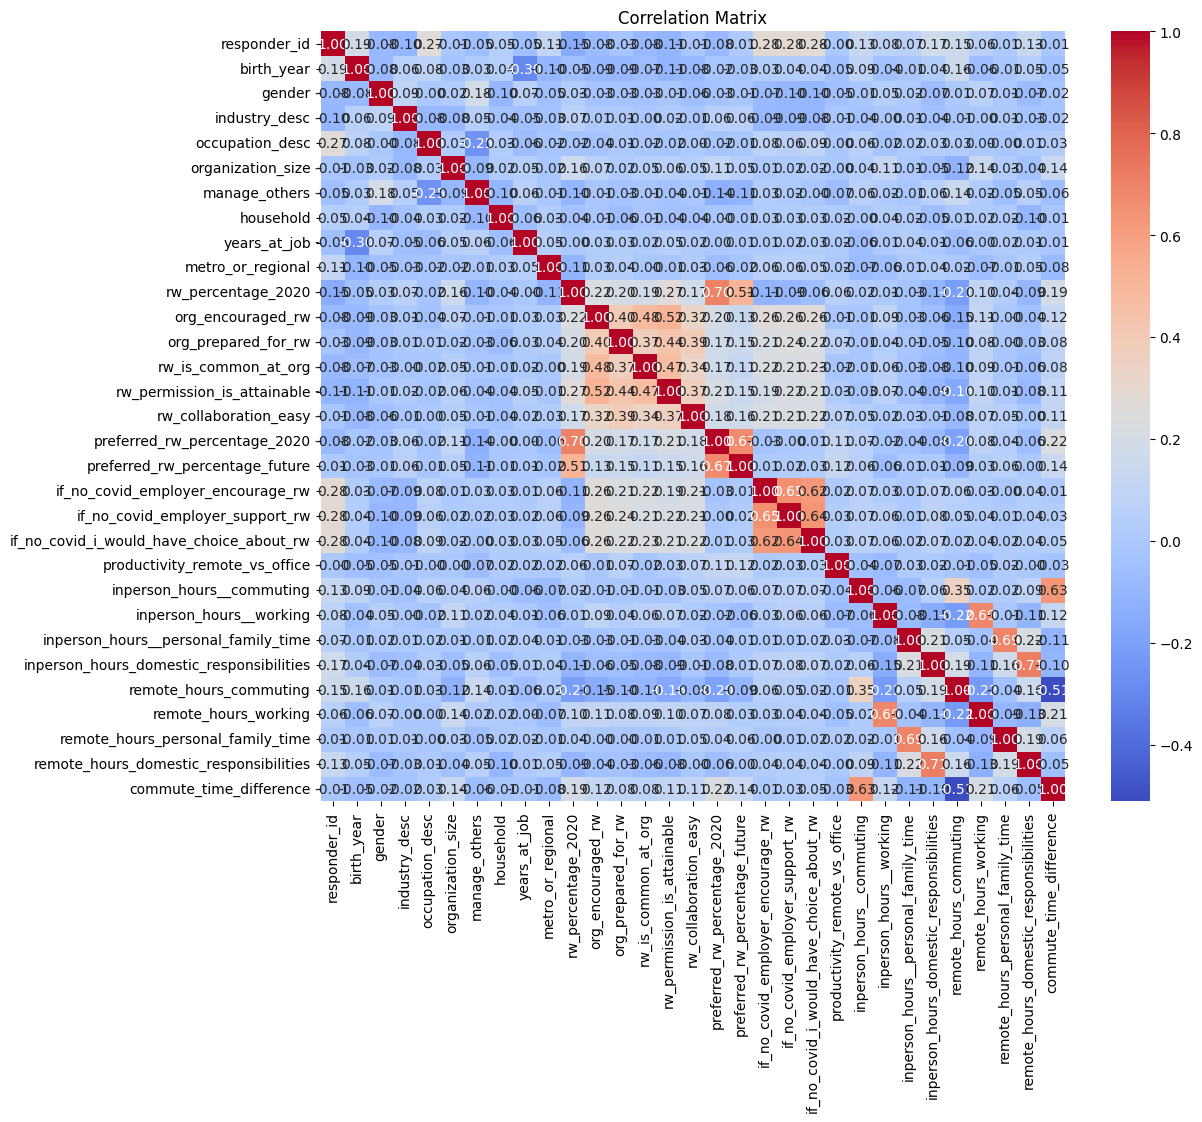

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from data.csv
data = pd.read_csv("data.csv")

# Convert non-numeric columns to numeric
data_encoded = data.copy()

# Convert categorical columns to numeric using label encoding
for column in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

# Select numeric columns
numeric_data = data_encoded.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("data.csv")

# Mapping for 'preferred_rw_percentage_future'
mapping = {
    "0-1 days": 0,
    "1-2 days": 0.25,
    "2-3 days": 0.5,
    "3-4 days": 0.75,
    "4-5 days": 1,
    "No response": None  # To be removed
}

# Apply mapping and remove rows with 'No response'
data["preferred_rw_percentage_future"] = data["preferred_rw_percentage_future"].map(mapping)
data = data.dropna(subset=["preferred_rw_percentage_future"])

# Preprocessing: Encode categorical variables
data_encoded = data.copy()
for column in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

# Define features (X) and target (y)
X = data_encoded.drop(columns=["preferred_rw_percentage_future"])
y = data_encoded["preferred_rw_percentage_future"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models and hyperparameters
models_and_params = {
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
        },
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.1, 1.0, 10.0],
        },
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
        },
    },
}

# Train models with hyperparameter tuning
best_models = {}
for model_name, config in models_and_params.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        cv=5,
        scoring="neg_mean_squared_error",
        verbose=1,
    )
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

    # Evaluate the best model
    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"MSE: {mse:.3f}, R^2: {r2:.3f}")
    print()

# Output the best models
print("Best models for each algorithm:")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")


Training RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
MSE: 0.049, R^2: 0.617

Training Ridge...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Ridge: {'alpha': 10.0}
MSE: 0.048, R^2: 0.626

Training SVR...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVR: {'C': 0.1, 'kernel': 'linear'}
MSE: 0.047, R^2: 0.639

Best models for each algorithm:
RandomForest: RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=150,
                      random_state=42)
Ridge: Ridge(alpha=10.0)
SVR: SVR(C=0.1, kernel='linear')


In [22]:
# Count and percentage of each unique value
value_counts = data["preferred_rw_percentage_future"].value_counts()
percentage = value_counts / len(data) * 100

# Combine into a single DataFrame for better visualization
support_df = pd.DataFrame({
    "Count": value_counts,
    "Percentage (%)": percentage
}).sort_index()

# Display the support for each unique value
print("Support for each unique value in preferred_rw_percentage_future:")
print(support_df)

Support for each unique value in preferred_rw_percentage_future:
                                Count  Percentage (%)
preferred_rw_percentage_future                       
0.00                              446       15.469997
0.25                              456       15.816857
0.50                              802       27.818245
0.75                              378       13.111342
1.00                              801       27.783559


In [33]:
row_1 = X_train[20].reshape(1, -1)

# Use the trained RandomForest model to make a prediction
best_rf_model = best_models["RandomForest"]  # Retrieve the best RandomForest model
row_1_prediction = best_rf_model.predict(row_1)

print(f"Prediction for row 1: {row_1_prediction[0]:.3f}")
print(y_train[20].reshape(1, -1))

Prediction for row 1: 0.869
[[1.]]


In [9]:
unique_values = data["preferred_rw_percentage_future"].unique()

unique_values_sorted = sorted(unique_values)
unique_values_sorted

['0-1 days', '1-2 days', '2-3 days', '3-4 days', '4-5 days', 'No response']

Epoch 1/200


c:\Users\Aiden\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4761 - mae: 0.3302 - val_loss: 0.3668 - val_mae: 0.2409 - learning_rate: 0.0010
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3581 - mae: 0.2277 - val_loss: 0.3293 - val_mae: 0.2250 - learning_rate: 0.0010
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3201 - mae: 0.2145 - val_loss: 0.3016 - val_mae: 0.2250 - learning_rate: 0.0010
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2811 - mae: 0.1954 - val_loss: 0.2835 - val_mae: 0.2350 - learning_rate: 0.0010
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2603 - mae: 0.1998 - val_loss: 0.2480 - val_mae: 0.2089 - learning_rate: 0.0010
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2309 - mae: 0.1873 - val_loss: 0.2266 - val_mae: 0.2070 - learning_rate: 0.0010
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2074 - mae: 0.1773 - val_loss: 0.2042 - val_mae: 0.1962 - learning_rate: 0.0010
Epoch 8/200
58/58 ━━━━━━━

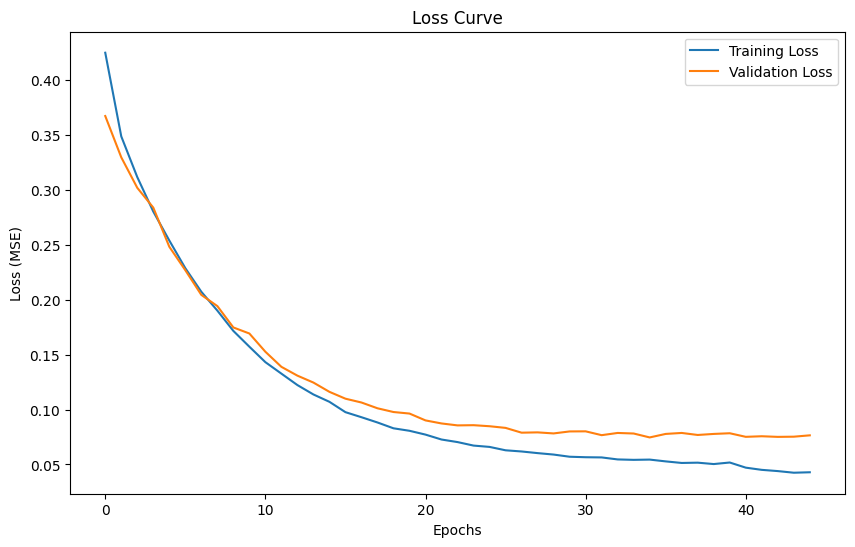

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define a more complex neural network
def create_complex_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.001)),
        Dropout(0.3),  # Dropout with 30% rate
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(1)  # Output layer for regression
    ])
    return model

# Compile the complex model
model = create_complex_model(input_dim)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Callbacks to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = model.predict(X_test).flatten()

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Enhanced Neural Network Results:")
print(f"MSE: {mse:.3f}")
print(f"R^2: {r2:.3f}")

# Plot the training process
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()
